In [1]:
#Loading All Needed Libraries

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Number Manupulation & Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection Libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

#Preprocessing Libraries
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

#Liner Model Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#pipeline libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import sklearn
import sklearn.decomposition

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color=red size=6> Define Objective </font>

Predict the price of house
1. It is a regression problem
- Make a model which has highest R-square score on test dataset. 
- At the same time R-Score score on Train dataset should be such that it can be confidently accepted by the customer

<font color=red size=6> Understanding Dataset</font>

In [3]:
df_house = pd.read_csv("House_train.csv")

In [35]:
df_house.shape

(1460, 81)

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
df_house.FireplaceQu

0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
30      NaN
31      NaN
32      NaN
33       Gd
34       Gd
35       Gd
36      NaN
37       TA
38      NaN
39      NaN
40       TA
41       Gd
42      NaN
43      NaN
44      NaN
45       Gd
46       Ex
47      NaN
48      NaN
49      NaN
50      NaN
51       Gd
52      NaN
53       Gd
54       TA
55       Gd
56      NaN
57      NaN
58       Gd
59      NaN
60      NaN
61      NaN
62       Gd
63      NaN
64      NaN
65       Gd
66       Gd
67      NaN
68      NaN
69       TA
70       Gd
71      NaN
72       TA
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80       Gd
81      NaN
82       Gd
83  

In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [41]:
df_house.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [39]:
df_house.YearBuilt.value_counts().sort_index()

1872     1
1875     1
1880     4
1882     1
1885     2
1890     2
1892     2
1893     1
1898     1
1900    10
1904     1
1905     1
1906     1
1908     2
1910    17
1911     1
1912     3
1913     1
1914     7
1915    10
1916     8
1917     1
1918     7
1919     3
1920    30
1921     6
1922     8
1923     7
1924     7
1925    16
1926     9
1927     3
1928     7
1929     4
1930     9
1931     6
1932     4
1934     3
1935     6
1936     9
1937     5
1938     4
1939     8
1940    18
1941    15
1942     2
1945     6
1946     7
1947     5
1948    14
1949    12
1950    20
1951     6
1952     5
1953    12
1954    24
1955    16
1956    14
1957    20
1958    24
1959    26
1960    17
1961    14
1962    19
1963    16
1964    15
1965    24
1966    18
1967    16
1968    22
1969    14
1970    24
1971    22
1972    23
1973    11
1974    10
1975     8
1976    33
1977    32
1978    16
1979     9
1980    10
1981     5
1982     6
1983     4
1984     9
1985     5
1986     5
1987     3
1988    11
1989     3

In [10]:
df_house.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [34]:
df_house.YearBuilt.value_counts().sort_values(ascending=True)

1905     1
1913     1
1893     1
1906     1
2010     1
1898     1
1872     1
1882     1
1917     1
1904     1
1875     1
1911     1
1892     2
1908     2
1885     2
1890     2
1942     2
1919     3
1989     3
1912     3
1987     3
1934     3
1927     3
1880     4
1932     4
1983     4
1938     4
1929     4
1986     5
1937     5
1981     5
1947     5
1991     5
1985     5
1952     5
1931     6
1982     6
1945     6
1921     6
1951     6
1935     6
1928     7
1914     7
1918     7
1946     7
1924     7
1923     7
1916     8
1939     8
1975     8
1922     8
1984     9
1930     9
1979     9
1936     9
1926     9
1980    10
1974    10
1900    10
1915    10
1988    11
1973    11
1949    12
1990    12
1953    12
1992    13
1948    14
1961    14
1969    14
1997    14
1956    14
1964    15
1941    15
1996    15
1967    16
1955    16
1925    16
1978    16
1963    16
1960    17
1993    17
1910    17
1966    18
1940    18
1995    18
2009    18
1962    19
1994    19
2001    20
1957    20
1950    20

In [11]:
df_house.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [12]:
df_house.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [45]:
df_house.isnull().sum()/len(df_house)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [7]:
#Identify Fields which has more than 80% null values
f= list((df_house.isnull().sum() /len(df_house)*100) >45)
cols_45perNullVal = df_house.iloc[:,f].columns

print ("Dropping {} fields: {}".format( len(cols_45perNullVal), cols_45perNullVal))
df_house.drop(columns=cols_45perNullVal, inplace=True)

Dropping 5 fields: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [8]:
#Identify Fields which has any Null values
f= list((df_house.isnull().sum() /len(df_house)*100) >0)
#All Fields which has any Null values
cols_with_NullVal = df_house.iloc[:,f].columns
#Numeric Fields which has any Null values
cols_with_NullVal_num= df_house[cols_with_NullVal].select_dtypes(['int64','float64']).columns
#Categorical Fields which has any Null values
cols_with_NullVal_cat= df_house[cols_with_NullVal].select_dtypes("object").columns

##dtypes: float64(3), int64(35), object(43)
cols_all = df_house.columns

##All Categorical Fields in Dataset
cols_all_cat = df_house.select_dtypes("object").columns

##All Numerial Fields in Dataset
cols_all_num = df_house.select_dtypes( ['int64','float64']).columns

##All Numerial Fields in Dataset which has Ordinal Variable
cols_all_ord  = ['OverallQual', 'OverallCond', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath',\
                'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold','MSSubClass']

f= list((df_house[cols_all_ord].isnull().sum() /len(df_house)*100) >0)
#All Numeric Feilds with Ordinal Values which has Null Values
cols_with_NullVal_ord = df_house.iloc[:,f].columns

##All Categorical Fields in Dataset which has null values
cols_with_NonNullVal_cat = list(set(cols_all_cat).difference( set(cols_with_NullVal_cat) ) )

##All Numerial Fields in Dataset which has null values
cols_with_NonNullVal_num = list(set(cols_all_num).difference( set(cols_with_NullVal_num) ) )

##All Ordinal Fields in Dataset which has null values
cols_with_NonNullVal_ord = list(set(cols_all_ord).difference( set(cols_with_NullVal_ord) ) )


##All Pure Numerial Fields in Dataset
cols_num = list(set(cols_all_num).difference( set(cols_all_ord) ))

In [24]:
df_house.PoolArea.unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [46]:
df_house.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [9]:
df_house[cols_num].describe()

,MasVnrArea,OpenPorchSF,PoolArea,MiscVal,LowQualFinSF,SalePrice,Id,ScreenPorch,BsmtFinSF1,GrLivArea,...,3SsnPorch,1stFlrSF,EnclosedPorch,GarageYrBlt,BsmtUnfSF,YearBuilt,WoodDeckSF,TotalBsmtSF,GarageArea,YearRemodAdd
count,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.685262,46.660274,2.758904,43.489041,5.844521,180921.195890,730.500000,15.060959,443.639726,1515.463699,...,3.409589,1162.626712,21.954110,1978.506164,567.240411,1971.267808,94.244521,1057.429452,472.980137,1984.865753
std,181.066207,66.256028,40.177307,496.123024,48.623081,79442.502883,421.610009,55.757415,456.098091,525.480383,...,29.317331,386.587738,61.119149,24.689725,441.866955,30.202904,125.338794,438.705324,213.804841,20.645407
min,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,1.000000,0.000000,0.000000,334.000000,...,0.000000,334.000000,0.000000,1900.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,1950.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,365.750000,0.000000,0.000000,1129.500000,...,0.000000,882.000000,0.000000,1961.000000,223.000000,1954.000000,0.000000,795.750000,334.500000,1967.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000,730.500000,0.000000,383.500000,1464.000000,...,0.000000,1087.000000,0.000000,1980.000000,477.500000,1973.000000,0.000000,991.500000,480.000000,1994.000000
75%,166.000000,68.000000,0.000000,0.000000,0.000000,214000.000000,1095.250000,0.000000,712.250000,1776.750000,...,0.000000,1391.250000,0.000000,2002.000000,808.000000,2000.000000,168.000000,1298.250000,576.000000,2004.000000
max,1600.000000,547.000000,738.000000,15500.000000,572.000000,755000.000000,1460.000000,480.000000,5644.000000,5642.000000,...,508.000000,4692.000000,552.000000,2010.000000,2336.000000,2010.000000,857.000000,6110.000000,1418.000000,2010.000000


<font color=red size=6>Check Null Values</fond>

In [10]:
(df_house.isnull().sum()/len(df_house)*100).sort_values()[::-1].head(15)

LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
RoofStyle        0.000000
dtype: float64

In [11]:
##Null value percentage for Categorical Fields
(df_house.select_dtypes("object").isnull().sum() /len(df_house)*100).sort_values()[::-1].head(17)

GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
Electrical       0.068493
SaleCondition    0.000000
BldgType         0.000000
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
LandSlope        0.000000
dtype: float64

In [12]:
##check what kind of values are stored in catorical fields
cats = ((df_house.select_dtypes("object").isnull().sum() /len(df_house)*100).sort_values()[::-1].head(16)>0).index

for i in cats:
    print ( df_house[i].astype("category").value_counts() , "\n=====================================")

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64 
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 
Normal     1198
Par

In [13]:
##Null Value percentage for numeric fields
df=(df_house.select_dtypes(["int64","float64"]).isnull().sum() /len(df_house)*100).sort_values()[::-1].head(3)
df

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [14]:
df_house[df.index].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [15]:
df_house[cols_num].describe() #excluding ordinal value fields

,MasVnrArea,OpenPorchSF,PoolArea,MiscVal,LowQualFinSF,SalePrice,Id,ScreenPorch,BsmtFinSF1,GrLivArea,...,3SsnPorch,1stFlrSF,EnclosedPorch,GarageYrBlt,BsmtUnfSF,YearBuilt,WoodDeckSF,TotalBsmtSF,GarageArea,YearRemodAdd
count,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.685262,46.660274,2.758904,43.489041,5.844521,180921.195890,730.500000,15.060959,443.639726,1515.463699,...,3.409589,1162.626712,21.954110,1978.506164,567.240411,1971.267808,94.244521,1057.429452,472.980137,1984.865753
std,181.066207,66.256028,40.177307,496.123024,48.623081,79442.502883,421.610009,55.757415,456.098091,525.480383,...,29.317331,386.587738,61.119149,24.689725,441.866955,30.202904,125.338794,438.705324,213.804841,20.645407
min,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,1.000000,0.000000,0.000000,334.000000,...,0.000000,334.000000,0.000000,1900.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,1950.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,365.750000,0.000000,0.000000,1129.500000,...,0.000000,882.000000,0.000000,1961.000000,223.000000,1954.000000,0.000000,795.750000,334.500000,1967.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000,730.500000,0.000000,383.500000,1464.000000,...,0.000000,1087.000000,0.000000,1980.000000,477.500000,1973.000000,0.000000,991.500000,480.000000,1994.000000
75%,166.000000,68.000000,0.000000,0.000000,0.000000,214000.000000,1095.250000,0.000000,712.250000,1776.750000,...,0.000000,1391.250000,0.000000,2002.000000,808.000000,2000.000000,168.000000,1298.250000,576.000000,2004.000000
max,1600.000000,547.000000,738.000000,15500.000000,572.000000,755000.000000,1460.000000,480.000000,5644.000000,5642.000000,...,508.000000,4692.000000,552.000000,2010.000000,2336.000000,2010.000000,857.000000,6110.000000,1418.000000,2010.000000


<font color=red size=6>Check Data Imbalance</font>

<font color=red size=5> Categorical Variable Data Imbalance</fond>

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


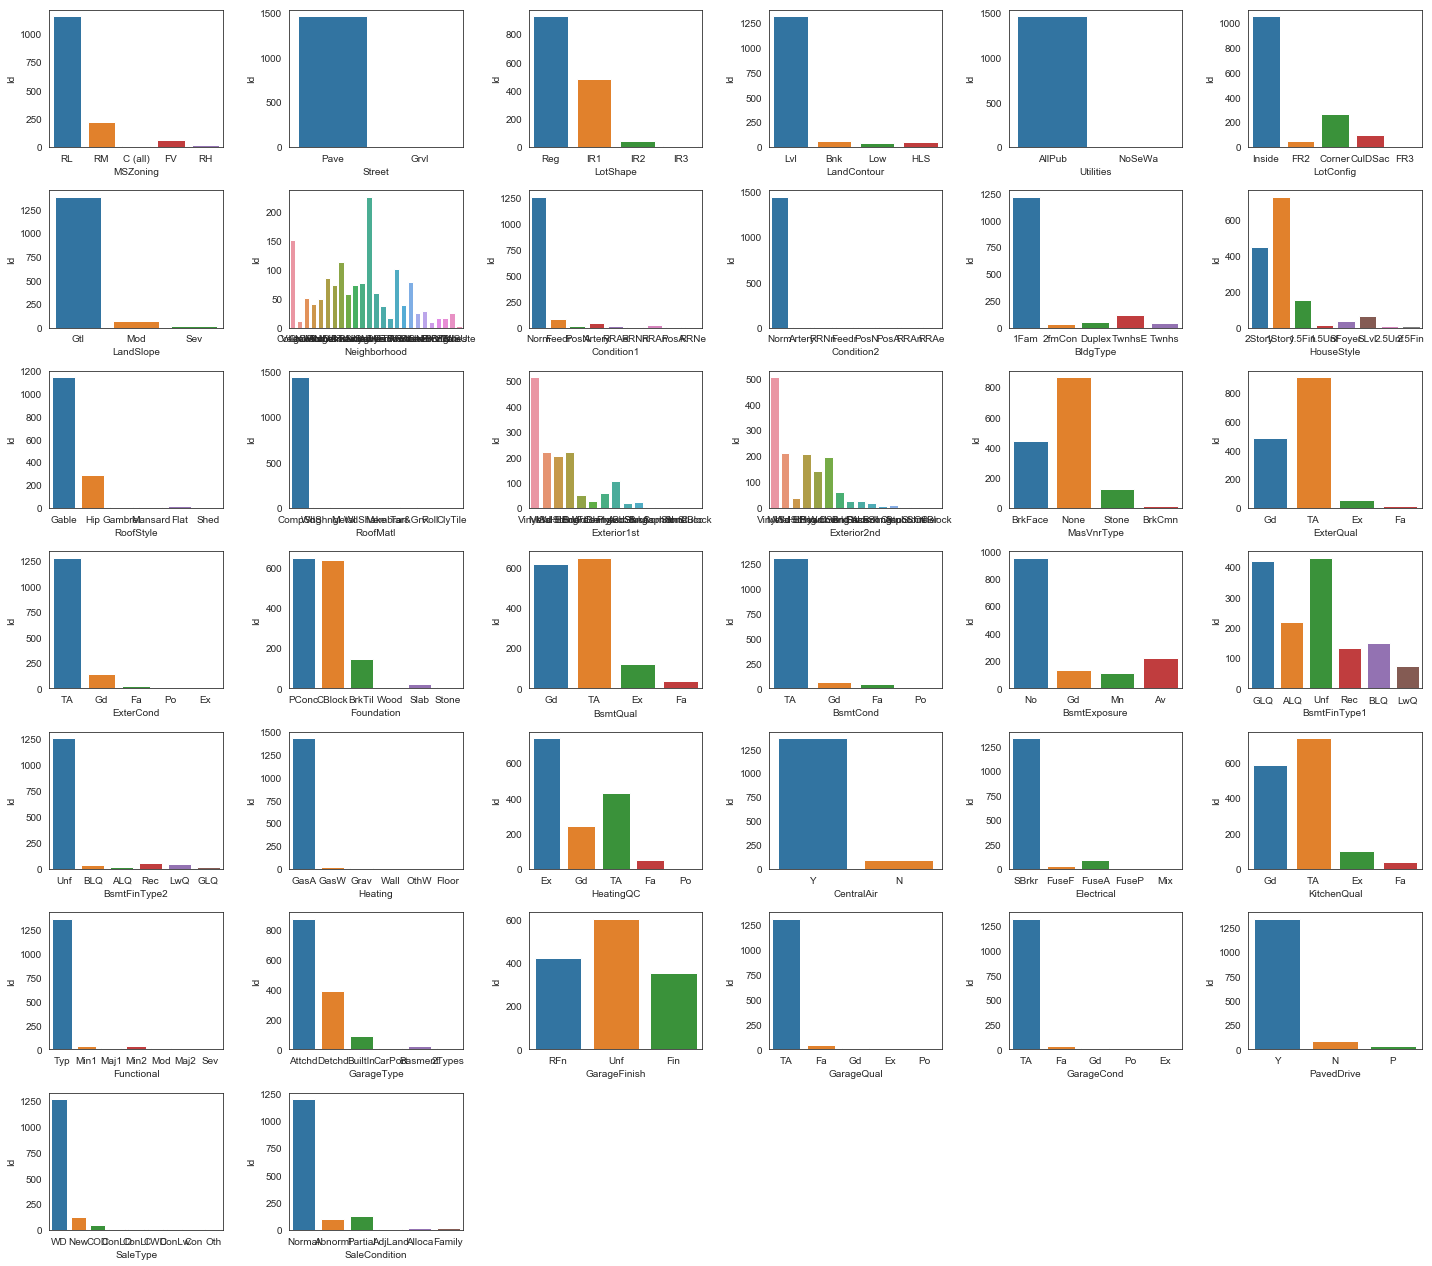

In [16]:
print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_cat):
    plt.subplot(40,6,i)
    sns.barplot(y="Id", x=cols_all_cat[i-1], data=df_house, ci=0, estimator=len)
    i+=1
plt.tight_layout()

<font color=red size=5> Oridinal Variable Data Imbalance</font>

['OverallQual', 'OverallCond', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSSubClass']


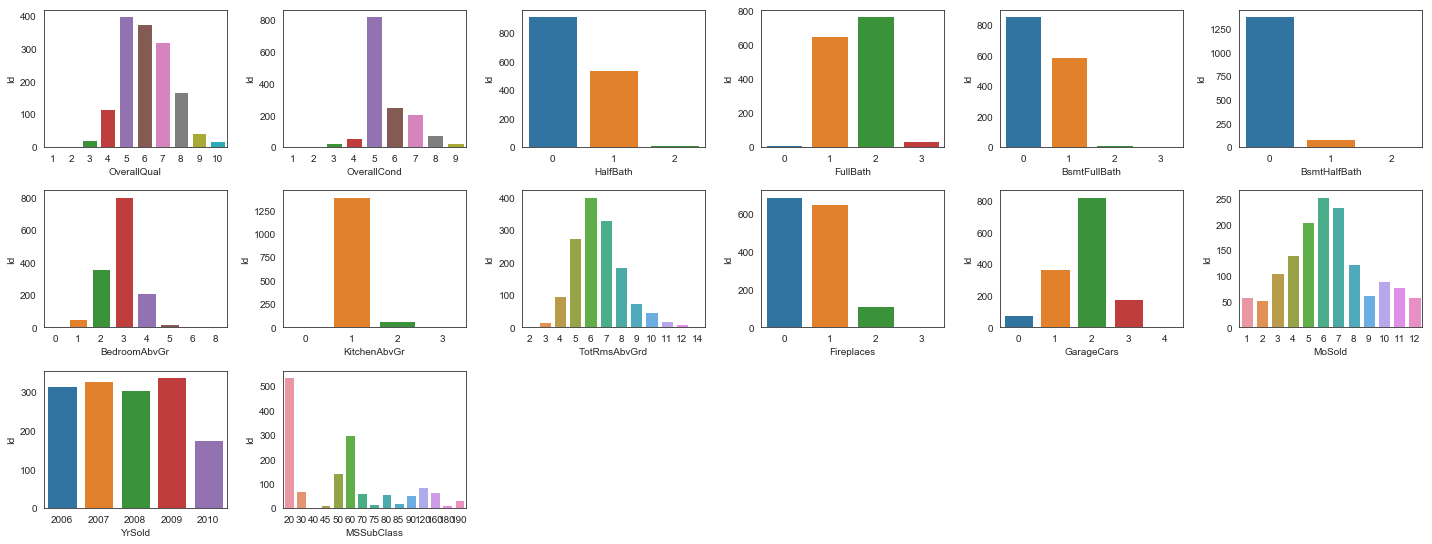

In [17]:
print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_ord):
    plt.subplot(40,6,i)
    sns.barplot(y="Id", x=cols_all_ord[i-1], data=df_house, ci=0, estimator=len)
    i+=1
plt.tight_layout()

<font color=red size=5> Numerical Variable Data Distribution</font>

['MasVnrArea', 'OpenPorchSF', 'PoolArea', 'MiscVal', 'LowQualFinSF', 'SalePrice', 'Id', 'ScreenPorch', 'BsmtFinSF1', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF2', 'LotFrontage', 'LotArea', '3SsnPorch', '1stFlrSF', 'EnclosedPorch', 'GarageYrBlt', 'BsmtUnfSF', 'YearBuilt', 'WoodDeckSF', 'TotalBsmtSF', 'GarageArea', 'YearRemodAdd']


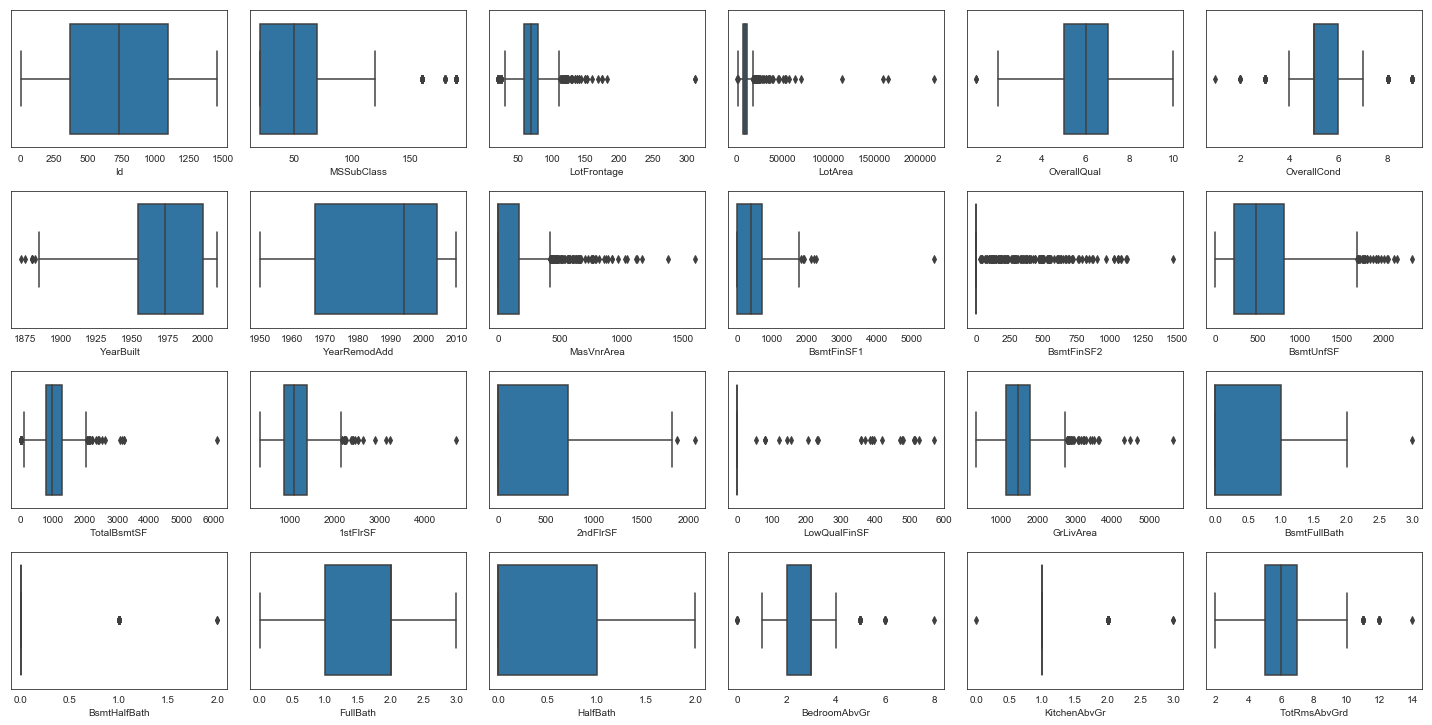

In [18]:
print (cols_num)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_num):
    plt.subplot(40,6,i)
    sns.boxplot( x=df_house[ cols_all_num[i-1] ])
    i+=1
plt.tight_layout()
plt.show()

<font color=red size=3> Feature Engigneering</font>

<font color=red size=3> Check Distribution Now</font>

<font color=red size=6>Imputing Null Values</font>

<font color=red size=5> Convert categorical variables into number</font>

We need to convert values in categorical variables in number for following reasons.
1. So that we can check relation between categorical variable and sales price. 
- So that we can do null value imputation using KNN. 
- So that we can do the modeling 

In [19]:
#df_house = df_house1.copy()

In [20]:
#If categorical variable has null value then it will assign 0 for that
#This function will return a categorical column with numeric values 
all_fldmap = pd.DataFrame()
 
def getValuesForCat(df, fld, hasNull=True, Print=True, fldmap_required=False):
    lst = list(df[fld].unique())

   # if hasNull:
   #     lst.remove(np.nan)
   #     lst.insert(0,np.nan)
    if Print:
        print ("Field Name:" , fld)
        print ("Original=>",lst)
        print ("Numeric=>",np.array(range(len(lst))), "\n")

    if fldmap_required:
        fmap = pd.DataFrame( list( zip([fld]*len(lst),lst, np.array(range(len(lst))) ) ) )
        fmap.columns = ['Fname','Original','Numeric']
        
        global all_fldmap
        
        all_fldmap = pd.concat([all_fldmap,fmap])
        
    return df[fld].apply(lambda x: lst.index(x))
    

In [21]:
#Replace categorical field with number (This shall be done only for those columns which does not have any null value)
i=0
while i< len(cols_with_NonNullVal_cat):
    colname = cols_with_NonNullVal_cat[i]
    df_house[colname]  = getValuesForCat(df=df_house, fld=colname,hasNull=False, Print=True,fldmap_required=True)
    i+=1 
print ("Processing Done")
#print (cols_with_NonNullVal_cat)

Field Name: Exterior1st
Original=> ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']
Numeric=> [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

Field Name: LotShape
Original=> ['Reg', 'IR1', 'IR2', 'IR3']
Numeric=> [0 1 2 3] 

Field Name: Foundation
Original=> ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']
Numeric=> [0 1 2 3 4 5] 

Field Name: ExterCond
Original=> ['TA', 'Gd', 'Fa', 'Po', 'Ex']
Numeric=> [0 1 2 3 4] 

Field Name: CentralAir
Original=> ['Y', 'N']
Numeric=> [0 1] 

Field Name: Condition1
Original=> ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Numeric=> [0 1 2 3 4 5 6 7 8] 

Field Name: LandContour
Original=> ['Lvl', 'Bnk', 'Low', 'HLS']
Numeric=> [0 1 2 3] 

Field Name: RoofStyle
Original=> ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
Numeric=> [0 1 2 3 4 5] 

Field Name: LandSlope
Original=> ['Gtl', 'Mod', 'Sev'

In [22]:
df_house1 = df_house.copy()

In [23]:
#Impute Null Categorical Values
def imputeNull_CatValues(df,fld,fldmap_required=False):
    # Get customed hotencoded categories for a given field, 
    # create a new field in main dataframe and assign this to that field    
    df[fld] = getValuesForCat(df=df_with_null, fld=fld, hasNull=True, Print=True, fldmap_required=fldmap_required)

    #create train dataset from main dataframe, it includes only non null rows of the given field
    #(in hotencoding process null is converted to 0)
    col =cols.copy()
    
    #create test dataset from main dataframe, it includes all the rows.
    X_test = df[col]
    
    col.append(fld)
    #training using null null columns
    df_train = df[col] [ df[fld]!=0]  

    #supplied fld in dataframe need to be classified. So we need to train using this field
    y_train= df_train[fld]
    X_train = df_train.drop(columns=fld)
    clusters = len(y_train.unique())

    #Training the model on the train data
    #from sklearn.linear_model import LogisticRegression
   
    #lr = LogisticRegression(max_iter=150)
    #lm = lr.fit(X_train,y_train)

    #predict using train data
    #pred_train_clusterid = lm.predict(X_train)

    #predict using test data
    #pred_test_clusterid = lm.predict(X_test)
    
    #KNeighborsClassifier is working better than above LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    km = KNeighborsClassifier(n_neighbors=clusters)
    
    print ( type(X_train), type(y_train))
    km.fit(X_train,y_train)
    pred_train_clusterid = km.predict(X_train)
    pred_test_clusterid = km.predict(X_test)
    
    print ("Accuracy on Train Dataset :",
    round(metrics.accuracy_score(y_train, pred_train_clusterid),2))
    print ("==========================================")
    
    df1 = pd.DataFrame( {"prediction":pred_test_clusterid, "actual":df[fld]})
    
    #create a need field in temp dataframe df1, 
    #for a given field if actual==0 (it has null value) then use prediction to replace
    df1.loc[ df1["actual"]==0,fld] = df1["prediction"]
    
    #If actual is not null then we should not use predicted cluster value, so use actual value
    df1.loc[ df1["actual"]!=0,fld] = df1["actual"]
    
    #ensure filed is integer
    df1[fld] = df1[fld].apply(int)
    
    #replace this column from temp df1 to main dataframe df
    df[fld] = df1[fld]
    
    #With this all null values for given field in the dataframe has been replace with the predicted value
    
    return

In [24]:
all_fldmap.shape
#df_house=df_house1.copy()

(182, 3)

In [26]:
def imputeNull_CatValues(df,fld,fldmap_required=False):
    # Get customed hotencoded categories for a given field, 
    # create a new field in main dataframe and assign this to that field    

    df[fld] = getValuesForCat(df=df_with_null, fld=fld, hasNull=True, Print=True, fldmap_required=fldmap_required)

    #create train dataset from main dataframe, it includes only non null rows of the given field
    #(in hotencoding process null is converted to 0)
    col =cols.copy()

    #create test dataset from main dataframe, it includes all the rows.
    X_test = df[col]

    col.append(fld)
    #training using null null columns
    df_train = df[col] [ df[fld]!=0]  

    #supplied fld in dataframe need to be classified. So we need to train using this field
    y_train= df_train[fld]
    X_train = df_train.drop(columns=fld)
    clusters = len(y_train.unique())

    #KNeighborsClassifier is working better than above LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    km = KNeighborsClassifier(n_neighbors=clusters)

    print ( type(X_train), type(y_train))
    km.fit(X_train,y_train)
    pred_train_clusterid = km.predict(X_train)
    pred_test_clusterid = km.predict(X_test)

    print ("Accuracy on Train Dataset :",
    round(metrics.accuracy_score(y_train, pred_train_clusterid),2))
    print ("==========================================")

    df1 = pd.DataFrame( {"prediction":pred_test_clusterid, "actual":df[fld]})

    #create a need field in temp dataframe df1, 
    #for a given field if actual==0 (it has null value) then use prediction to replace
    df1.loc[ df1["actual"]==0,fld] = df1["prediction"]

    #If actual is not null then we should not use predicted cluster value, so use actual value
    df1.loc[ df1["actual"]!=0,fld] = df1["actual"]

    #ensure filed is integer
    df1[fld] = df1[fld].apply(int)

    #replace this column from temp df1 to main dataframe df
    df[fld] = df1[fld]



In [27]:
## List of All Non Null columns which can be used to create cluster and then Null Value Imputation
cols = cols_with_NonNullVal_cat + cols_with_NonNullVal_num

## This steps impute null values only in Categorical Fields
df_with_null = df_house[cols_with_NullVal_cat]
for colname in cols_with_NullVal_cat:
    imputeNull_CatValues(df_house,colname,fldmap_required=True)

Field Name: MasVnrType
Original=> ['BrkFace', 'None', 'Stone', 'BrkCmn', nan]
Numeric=> [0 1 2 3 4] 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Accuracy on Train Dataset : 0.9
Field Name: BsmtQual
Original=> ['Gd', 'TA', 'Ex', nan, 'Fa']
Numeric=> [0 1 2 3 4] 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Accuracy on Train Dataset : 0.88
Field Name: BsmtCond
Original=> ['TA', 'Gd', nan, 'Fa', 'Po']
Numeric=> [0 1 2 3 4] 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Accuracy on Train Dataset : 0.68
Field Name: BsmtExposure
Original=> ['No', 'Gd', 'Mn', 'Av', nan]
Numeric=> [0 1 2 3 4] 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Accuracy on Train Dataset : 0.66
Field Name: BsmtFinType1
Original=> ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
Numeric=> [0 1 2 3 4 5 6] 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Accuracy on Train Datas

In [28]:
all_fldmap.shape

(245, 3)

In [29]:
#Impute Numeric Values
print ("Imputing Numeric Cols of Null Values with Mean")

for colname in cols_with_NullVal_num:
    val = round(df_house[colname].mean(),1)
    print (colname, " imputed with ", val)
    df_house[colname] [ df_house[colname].isna() ]  = val

Imputing Numeric Cols of Null Values with Mean
LotFrontage  imputed with  70.0
MasVnrArea  imputed with  103.7
GarageYrBlt  imputed with  1978.5


In [30]:
#Impute Numeric Values
print ("Imputing Numeric (Ordinal Value) Cols with Null Values with Median")

for colname in cols_with_NullVal_ord:
    val= df_house[colname].median()
    print (colname, " imputed with ", val)
    df_house[colname] [ df_house[colname].isna() ]  = val

Imputing Numeric (Ordinal Value) Cols with Null Values with Median


In [31]:
#Check Null Values
(df_house.isnull().sum()/len(df_house)*100).sort_values()[::-1].head(10)

SalePrice      0.0
ExterCond      0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
MasVnrArea     0.0
ExterQual      0.0
Foundation     0.0
dtype: float64

<font color=red size=6> Visualising Relationship between y & X</font>

__Normalise Distribution of Target Varable__

In [32]:
#df_house=df_house1.copy()

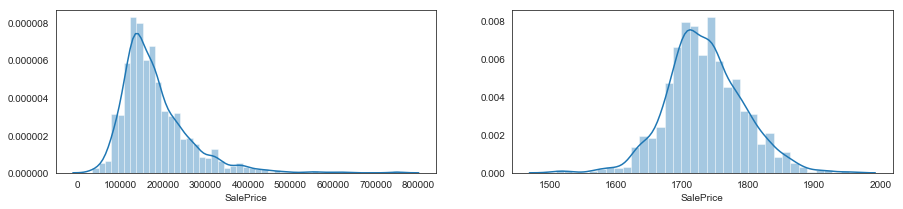

In [33]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df_house.SalePrice)
plt.subplot(1,2,2)
sns.distplot(np.log2(df_house.SalePrice)*100)
plt.show()

In [34]:
df_house.SalePrice = df_house.SalePrice * 100

<font color=red size=5>Check SalesPrice & Cateorical Variable Relationship</font>

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


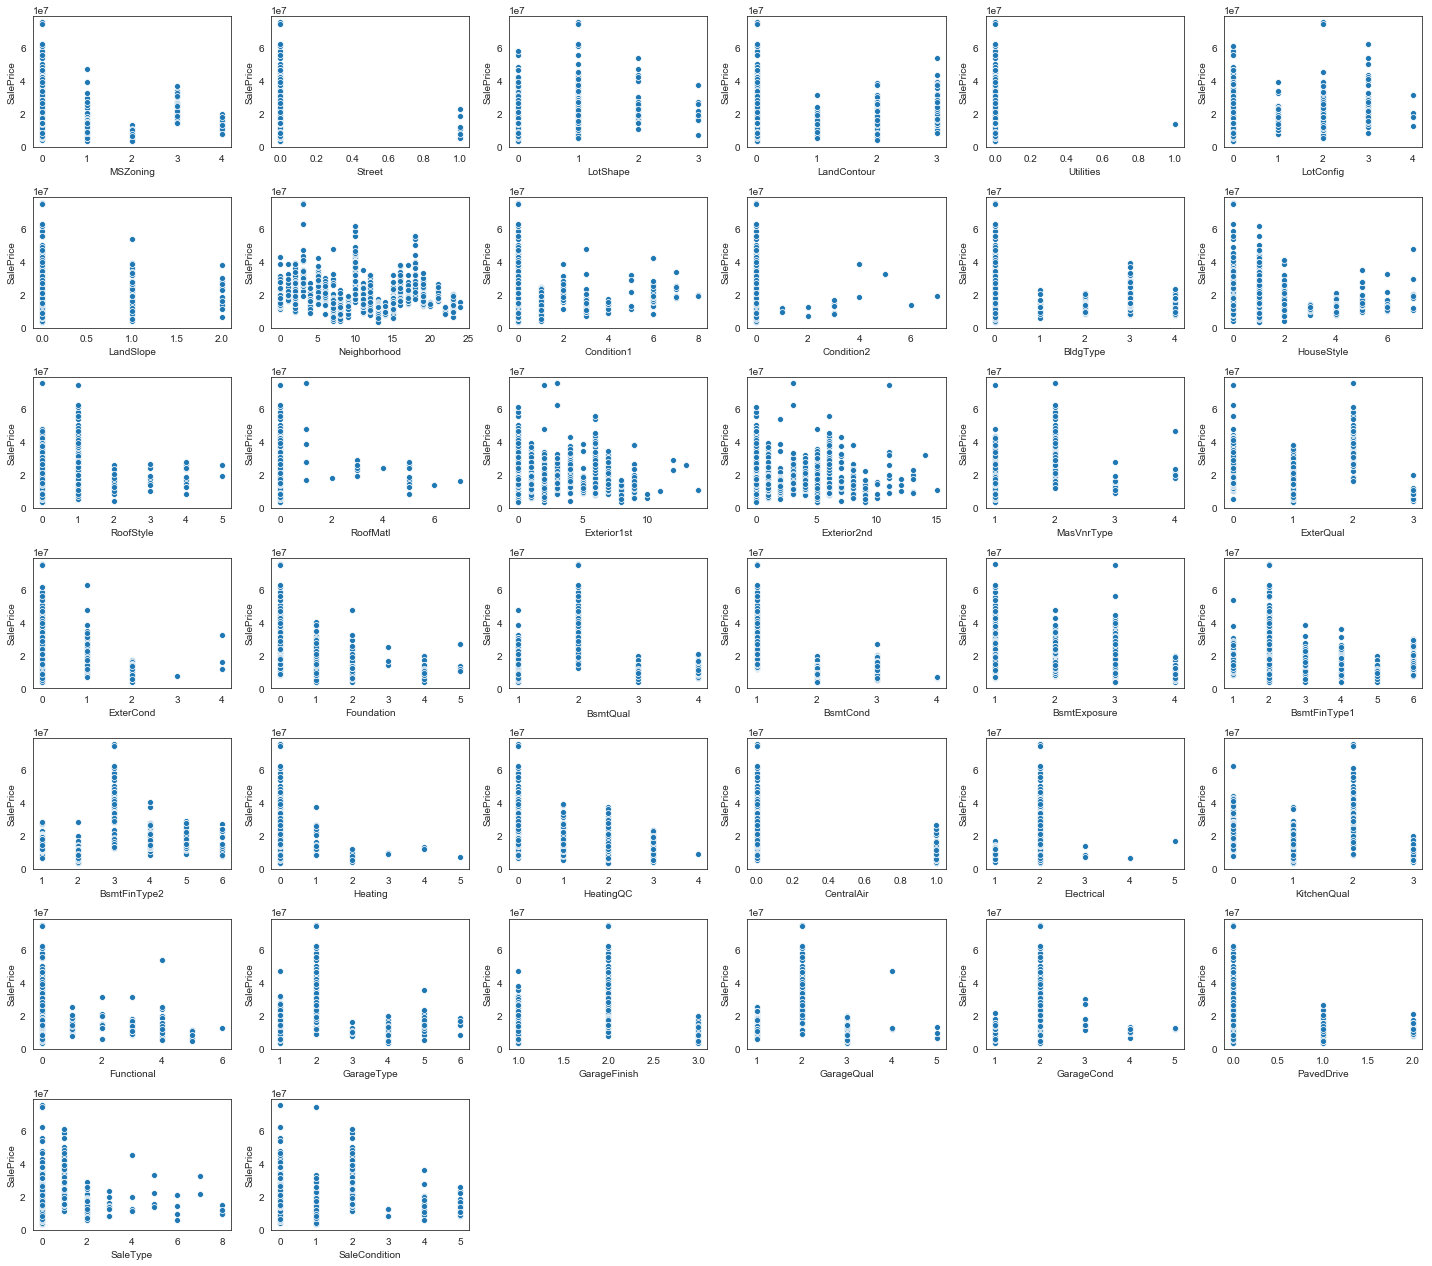

In [35]:
print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_cat):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df_house.SalePrice, x=cols_all_cat[i-1], data=df_house)
    i+=1
plt.tight_layout()

<font color=red size=5>Check SalesPrice & Ordinal Variable Relationship</font>

['OverallQual', 'OverallCond', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSSubClass']


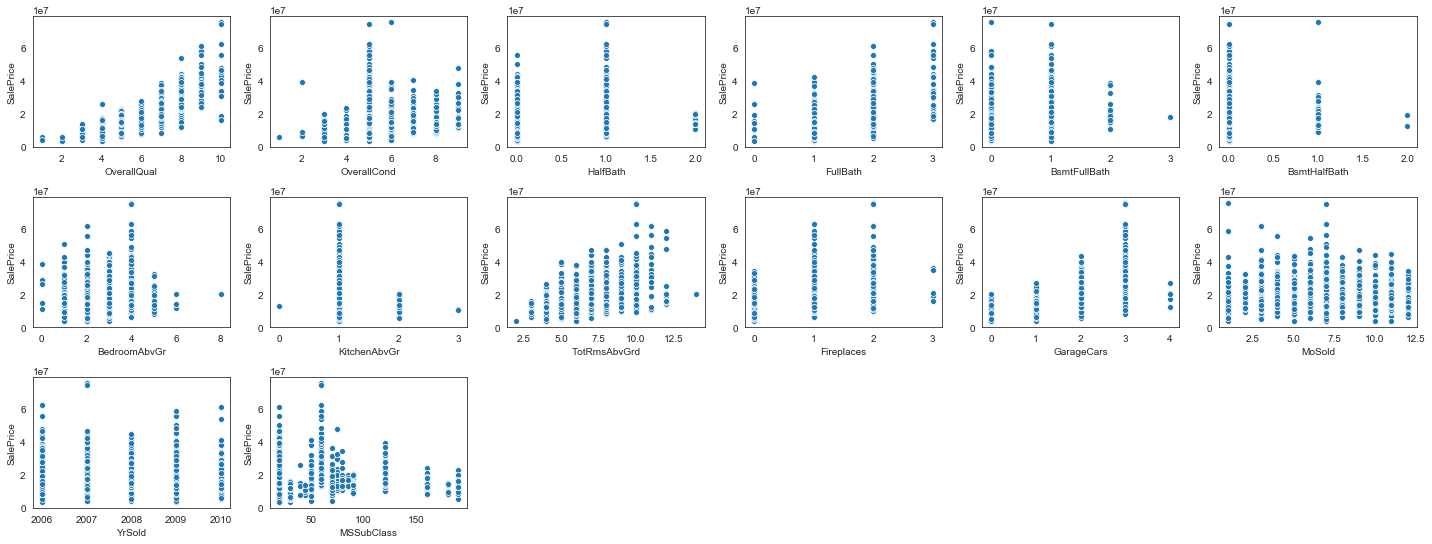

In [36]:
print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_ord):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df_house.SalePrice, x=cols_all_ord[i-1], data=df_house)
    i+=1
plt.tight_layout()

<font color=red size=5> Check SalesPrice & Numeric Variable Relationship</font>

In [ ]:
print (cols_num)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_num):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df_house.SalePrice, x=cols_num[i-1], data=df_house)
    i+=1
plt.tight_layout()

#All fields looks have liner relationship. So no transformation is required for any field.

<font color=red size=5> Check Degree of Correlation between SalesPrice & Numeric Variable</font>

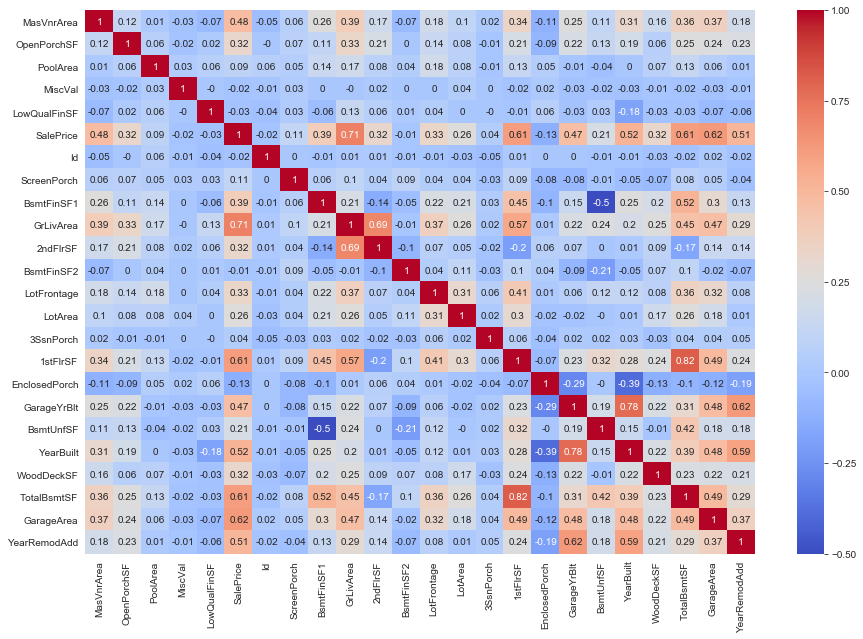

In [37]:
df_corr = np.round(df_house[cols_num].corr(),2)
sns.set_style("white")
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

In [38]:
df_corr

,MasVnrArea,OpenPorchSF,PoolArea,MiscVal,LowQualFinSF,SalePrice,Id,ScreenPorch,BsmtFinSF1,GrLivArea,...,3SsnPorch,1stFlrSF,EnclosedPorch,GarageYrBlt,BsmtUnfSF,YearBuilt,WoodDeckSF,TotalBsmtSF,GarageArea,YearRemodAdd
MasVnrArea,1.00,0.12,0.01,-0.03,-0.07,0.48,-0.05,0.06,0.26,0.39,...,0.02,0.34,-0.11,0.25,0.11,0.31,0.16,0.36,0.37,0.18
OpenPorchSF,0.12,1.00,0.06,-0.02,0.02,0.32,-0.00,0.07,0.11,0.33,...,-0.01,0.21,-0.09,0.22,0.13,0.19,0.06,0.25,0.24,0.23
PoolArea,0.01,0.06,1.00,0.03,0.06,0.09,0.06,0.05,0.14,0.17,...,-0.01,0.13,0.05,-0.01,-0.04,0.00,0.07,0.13,0.06,0.01
MiscVal,-0.03,-0.02,0.03,1.00,-0.00,-0.02,-0.01,0.03,0.00,-0.00,...,0.00,-0.02,0.02,-0.03,-0.02,-0.03,-0.01,-0.02,-0.03,-0.01
LowQualFinSF,-0.07,0.02,0.06,-0.00,1.00,-0.03,-0.04,0.03,-0.06,0.13,...,-0.00,-0.01,0.06,-0.03,0.03,-0.18,-0.03,-0.03,-0.07,-0.06
SalePrice,0.48,0.32,0.09,-0.02,-0.03,1.00,-0.02,0.11,0.39,0.71,...,0.04,0.61,-0.13,0.47,0.21,0.52,0.32,0.61,0.62,0.51
Id,-0.05,-0.00,0.06,-0.01,-0.04,-0.02,1.00,0.00,-0.01,0.01,...,-0.05,0.01,0.00,0.00,-0.01,-0.01,-0.03,-0.02,0.02,-0.02
ScreenPorch,0.06,0.07,0.05,0.03,0.03,0.11,0.00,1.00,0.06,0.10,...,-0.03,0.09,-0.08,-0.08,-0.01,-0.05,-0.07,0.08,0.05,-0.04
BsmtFinSF1,0.26,0.11,0.14,0.00,-0.06,0.39,-0.01,0.06,1.00,0.21,...,0.03,0.45,-0.10,0.15,-0.50,0.25,0.20,0.52,0.30,0.13
GrLivArea,0.39,0.33,0.17,-0.00,0.13,0.71,0.01,0.10,0.21,1.00,...,0.02,0.57,0.01,0.22,0.24,0.20,0.25,0.45,0.47,0.29


<font color=red size=5> Create Dummy Fields, Split Dataset & Scale Numeric Fields</font>

In [ ]:
df_house.head()

In [39]:
#Create dummy fields for all cateorical variables
for colname in cols_all_cat:
    temp = pd.get_dummies( df_house[colname], prefix=colname, drop_first=True)
    df_house.drop(columns=colname, inplace=True)
    df_house = pd.concat([df_house, temp], axis=1)

In [40]:
df_house.shape

(1460, 234)

In [41]:
#Split Dataset in X & y
Xcols = list(df_house.columns)
Xcols.remove("SalePrice")

X = df_house[Xcols]
y= df_house.SalePrice

In [42]:
# split X, y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train_id = X_train.Id
X_test_id = X_test.Id

X_train = X_train.drop(columns="Id")
X_test = X_test.drop(columns="Id")

In [43]:
# scaling the numeric feature features in train and test
from sklearn.preprocessing import StandardScaler

cols_scale = cols_num.copy()

cols_scale.remove("Id")
cols_scale.remove("SalePrice")

sc = StandardScaler()
X_train[cols_scale] =pd.DataFrame( sc.fit_transform( X_train[cols_scale] ), index=X_train.index )
X_test[cols_scale]  =pd.DataFrame( sc.transform( X_test[cols_scale] ) , index=X_test.index)

<font color=red size=5>__Start Modeling__</font>

<font color=red size=4>Lasso Regression</font>

In [44]:
X_train[cols_scale].head()

,MasVnrArea,OpenPorchSF,PoolArea,MiscVal,LowQualFinSF,ScreenPorch,BsmtFinSF1,GrLivArea,2ndFlrSF,BsmtFinSF2,...,3SsnPorch,1stFlrSF,EnclosedPorch,GarageYrBlt,BsmtUnfSF,YearBuilt,WoodDeckSF,TotalBsmtSF,GarageArea,YearRemodAdd
210,-0.560538,-0.709347,-0.062302,-0.084263,-0.124502,-0.275126,0.043512,-1.228053,-0.787597,-0.293313,...,-0.121922,-0.765065,1.150231,-0.010580,-0.374367,-1.524903,-0.743160,-0.430911,-2.217786,-1.694350
318,0.807462,0.197980,-0.062302,-0.084263,-0.124502,-0.275126,1.160345,2.123103,2.140556,-0.293313,...,-0.121922,0.511914,1.910043,0.595338,-0.454644,0.717033,1.989482,0.621579,0.867506,0.390956
239,-0.560538,1.407748,-0.062302,-0.084263,-0.124502,-0.275126,-0.761296,-0.056465,0.795996,-0.293313,...,-0.121922,-0.930972,-0.369395,-1.243310,0.171964,-0.865510,-0.743160,-0.712011,-1.183084,-1.694350
986,-0.560538,-0.709347,-0.062302,-0.084263,-0.124502,-0.275126,-0.963574,0.221858,0.669584,-0.293313,...,-0.121922,-0.420683,-0.369395,-1.201522,-0.175904,-2.019448,2.423490,-1.256778,-1.018473,0.875911
1416,-0.560538,-0.709347,-0.062302,-0.084263,-0.124502,-0.275126,-0.963574,1.453624,1.611926,-0.293313,...,-0.121922,0.195183,1.435160,-0.323986,0.475233,-2.843689,-0.743160,-0.620490,0.416000,-1.694350


In [45]:
# list of alphas to tune
#alpha_val = [.001,.05,.1,.2,.5,1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
alpha_val = [10,100,1000,5000,8000,10000,12000,14000,16000,18000,20000 ]
params = {'alpha': alpha_val}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
lasso = Lasso(max_iter=1000)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247806065357651.0, tolerance: 4832711484716.295
  positive)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1043707361850917.2, tolerance: 5304661568864.086
  positive)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314076496801240.0, tolerance: 5156187973266.669
  positive)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [10, 100, 1000, 5000, 8000, 10000, 12000,
                                   14000, 16000, 18000, 20000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155183,0.014734,0.001197,3.992086e-04,10,{'alpha': 10},-1.966738e+06,-1.806797e+06,-1.634088e+06,-2.205744e+06,...,-1.862542e+06,205227.305412,11,-1.052613e+06,-1.120640e+06,-1.161362e+06,-1.165082e+06,-1.144645e+06,-1.128869e+06,41227.998027
1,0.075198,0.016745,0.001396,4.890450e-04,100,{'alpha': 100},-1.954149e+06,-1.799826e+06,-1.614578e+06,-2.189282e+06,...,-1.850436e+06,204026.700265,10,-1.052393e+06,-1.122285e+06,-1.160882e+06,-1.164952e+06,-1.145159e+06,-1.129134e+06,41191.451348
2,0.125864,0.039650,0.001197,3.991131e-04,1000,{'alpha': 1000},-1.856982e+06,-1.733956e+06,-1.491774e+06,-2.085771e+06,...,-1.756890e+06,204370.643214,9,-1.076583e+06,-1.148653e+06,-1.173559e+06,-1.178808e+06,-1.171758e+06,-1.149872e+06,38079.336251
3,0.099533,0.033416,0.000998,5.761645e-07,5000,{'alpha': 5000},-1.743538e+06,-1.655809e+06,-1.406776e+06,-1.886382e+06,...,-1.631674e+06,176711.454773,5,-1.142284e+06,-1.207473e+06,-1.234236e+06,-1.241105e+06,-1.238568e+06,-1.212733e+06,37217.016090
4,0.069215,0.013999,0.001397,4.885584e-04,8000,{'alpha': 8000},-1.708160e+06,-1.665657e+06,-1.417256e+06,-1.851008e+06,...,-1.620182e+06,161463.162350,2,-1.186982e+06,-1.245706e+06,-1.264537e+06,-1.268666e+06,-1.280123e+06,-1.249203e+06,33026.247808
5,0.050864,0.015719,0.001396,4.888699e-04,10000,{'alpha': 10000},-1.695810e+06,-1.678314e+06,-1.423877e+06,-1.835312e+06,...,-1.619229e+06,154078.250241,1,-1.220355e+06,-1.270510e+06,-1.284834e+06,-1.287797e+06,-1.306749e+06,-1.274049e+06,29224.129025
6,0.038896,0.005535,0.001795,3.991367e-04,12000,{'alpha': 12000},-1.706248e+06,-1.686902e+06,-1.435832e+06,-1.819377e+06,...,-1.623896e+06,146781.796898,3,-1.256971e+06,-1.290590e+06,-1.305178e+06,-1.303957e+06,-1.326960e+06,-1.296731e+06,23047.579950
7,0.035505,0.004397,0.001197,3.994466e-04,14000,{'alpha': 14000},-1.730928e+06,-1.688968e+06,-1.454106e+06,-1.807042e+06,...,-1.630867e+06,141848.602555,4,-1.294708e+06,-1.308375e+06,-1.324683e+06,-1.318979e+06,-1.344737e+06,-1.318296e+06,16704.696229
8,0.030918,0.003339,0.001197,3.988747e-04,16000,{'alpha': 16000},-1.757930e+06,-1.683795e+06,-1.470537e+06,-1.797328e+06,...,-1.637671e+06,138152.010667,6,-1.325219e+06,-1.323168e+06,-1.344096e+06,-1.334254e+06,-1.363792e+06,-1.338106e+06,14830.187151
9,0.028324,0.002931,0.001396,4.880521e-04,18000,{'alpha': 18000},-1.786586e+06,-1.679434e+06,-1.488075e+06,-1.785093e+06,...,-1.644249e+06,135843.033948,7,-1.355247e+06,-1.338187e+06,-1.366538e+06,-1.347924e+06,-1.383865e+06,-1.358352e+06,15766.905596


In [47]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155183,0.014734,0.001197,3.992086e-04,10,{'alpha': 10},-1.966738e+06,-1.806797e+06,-1.634088e+06,-2.205744e+06,...,-1.862542e+06,205227.305412,11,-1.052613e+06,-1.120640e+06,-1.161362e+06,-1.165082e+06,-1.144645e+06,-1.128869e+06,41227.998027
1,0.075198,0.016745,0.001396,4.890450e-04,100,{'alpha': 100},-1.954149e+06,-1.799826e+06,-1.614578e+06,-2.189282e+06,...,-1.850436e+06,204026.700265,10,-1.052393e+06,-1.122285e+06,-1.160882e+06,-1.164952e+06,-1.145159e+06,-1.129134e+06,41191.451348
2,0.125864,0.039650,0.001197,3.991131e-04,1000,{'alpha': 1000},-1.856982e+06,-1.733956e+06,-1.491774e+06,-2.085771e+06,...,-1.756890e+06,204370.643214,9,-1.076583e+06,-1.148653e+06,-1.173559e+06,-1.178808e+06,-1.171758e+06,-1.149872e+06,38079.336251
3,0.099533,0.033416,0.000998,5.761645e-07,5000,{'alpha': 5000},-1.743538e+06,-1.655809e+06,-1.406776e+06,-1.886382e+06,...,-1.631674e+06,176711.454773,5,-1.142284e+06,-1.207473e+06,-1.234236e+06,-1.241105e+06,-1.238568e+06,-1.212733e+06,37217.016090
4,0.069215,0.013999,0.001397,4.885584e-04,8000,{'alpha': 8000},-1.708160e+06,-1.665657e+06,-1.417256e+06,-1.851008e+06,...,-1.620182e+06,161463.162350,2,-1.186982e+06,-1.245706e+06,-1.264537e+06,-1.268666e+06,-1.280123e+06,-1.249203e+06,33026.247808
5,0.050864,0.015719,0.001396,4.888699e-04,10000,{'alpha': 10000},-1.695810e+06,-1.678314e+06,-1.423877e+06,-1.835312e+06,...,-1.619229e+06,154078.250241,1,-1.220355e+06,-1.270510e+06,-1.284834e+06,-1.287797e+06,-1.306749e+06,-1.274049e+06,29224.129025
6,0.038896,0.005535,0.001795,3.991367e-04,12000,{'alpha': 12000},-1.706248e+06,-1.686902e+06,-1.435832e+06,-1.819377e+06,...,-1.623896e+06,146781.796898,3,-1.256971e+06,-1.290590e+06,-1.305178e+06,-1.303957e+06,-1.326960e+06,-1.296731e+06,23047.579950
7,0.035505,0.004397,0.001197,3.994466e-04,14000,{'alpha': 14000},-1.730928e+06,-1.688968e+06,-1.454106e+06,-1.807042e+06,...,-1.630867e+06,141848.602555,4,-1.294708e+06,-1.308375e+06,-1.324683e+06,-1.318979e+06,-1.344737e+06,-1.318296e+06,16704.696229
8,0.030918,0.003339,0.001197,3.988747e-04,16000,{'alpha': 16000},-1.757930e+06,-1.683795e+06,-1.470537e+06,-1.797328e+06,...,-1.637671e+06,138152.010667,6,-1.325219e+06,-1.323168e+06,-1.344096e+06,-1.334254e+06,-1.363792e+06,-1.338106e+06,14830.187151
9,0.028324,0.002931,0.001396,4.880521e-04,18000,{'alpha': 18000},-1.786586e+06,-1.679434e+06,-1.488075e+06,-1.785093e+06,...,-1.644249e+06,135843.033948,7,-1.355247e+06,-1.338187e+06,-1.366538e+06,-1.347924e+06,-1.383865e+06,-1.358352e+06,15766.905596


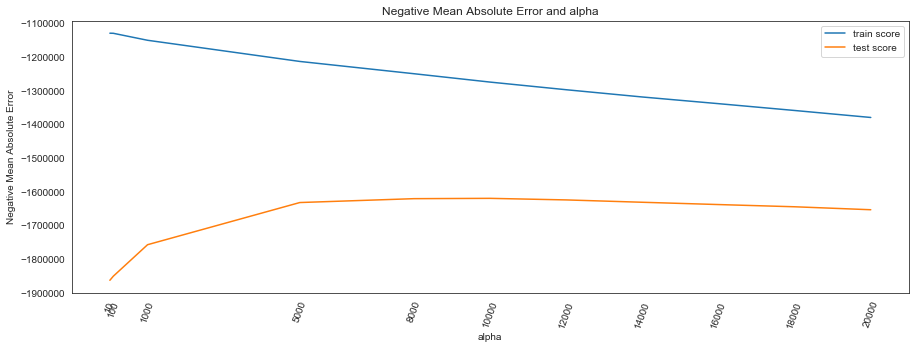

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results.loc[ cv_results['param_alpha']<=20000, "param_alpha" ]#.astype('float32')

# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
#plt.xticks([.01,.05,.1,.2,.5,1,2,3,4,5])
plt.xticks(alpha_val)
plt.xticks(rotation=70)
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
cv_results[ ['param_alpha','mean_test_score','mean_train_score'] ]

<font color=red size=3>__Retrain Lasso Regression with optimum Alpha & Get R Squre Score__</font>

In [51]:
alpha =5000
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train)

y_test_predict_lasso = round(pd.Series(lasso.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_lasso)

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35454095626843.5, tolerance: 6380698799477.067
  positive)


0.8809138969591093

<font size=4 color=red>__Columns selected by Lasso__</font>

In [52]:
coef_lasso = pd.DataFrame(lasso.coef_, index = X_train.columns).reset_index()
coef_lasso.columns = ["Feature","coef"]
#coef_lasso

In [53]:
cols_selected = coef_lasso[ coef_lasso.coef!=0]['Feature']

In [54]:
cols_selected = coef_lasso[ coef_lasso.coef!=0]['Feature']
X_train_new = X_train[cols_selected]
print ("Total # of Columns in dataset", len(df_house.columns))
print ("Columns Selected by Lasso ", len(cols_selected))

Total # of Columns in dataset 234
Columns Selected by Lasso  131


<font size=4 color=red>__Rebuild the Model Using Lasso, RFE and VIF__</font>

<font size=3 color=red>__Check Multi Colinearity__</font>

In [55]:
#This function will give VIF for df supplied as param

def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [56]:
#This function builds model, prints error summary, return features selected by RFE and prints summary of regression
#This all is done depends what parameter is passed to this function

#Parameters of this function
#X_Data it may be X_train or X_Test.
#number_of_rfe_features means how many features you want RFE to select for you
#predict=True mean return the model and print error terms graph. 
#predict=False means return the columns selected by RFE &  model. It also print the linearRegression summary
#train=True mean fit the model. train=False mean donot fit the model. 
#when Train= true then X_Data should be X_train dataframe
#DisplayTable = True means Print the summary of regression

def buildModel(X_data, y_data, number_of_rfe_features, predict=False, train=True, rsquare_train=False,
              DisplayTable=False):

    if train:
        #Initiate LinearRegression Model Object
        lm = LinearRegression()

        #Fit Model on Train Data
        lm.fit(X_data, y_data)

        #Identify top n features from the dataframe
        rfe = RFE(lm, number_of_rfe_features)             
        rfe = rfe.fit(X_data, y_data)

        #Name of those top n features
        col = X_data.columns[rfe.support_]

        # Creating X_train dataframe with RFE selected variables
        X_train_rfe = X_data[col]

        # Adding a constant variable, because statsmodel.ols 
        #does not have intercept by default and line go through 0,0
        X_train_rfe = sm.add_constant(X_train_rfe)
        
        # Running the linear model
        lm = sm.OLS(y_data,X_train_rfe).fit()
        
        if rsquare_train:
            return r2_score(y_data,lm.predict(X_train_rfe))

    if predict:
        fig = plt.figure(figsize=(15,5))
        
        # Plot heading 
        fig.suptitle('Error Terms', fontsize = 20)  
        plt.subplot(1,2,1)
        #predict the price
        y_train_predict = lm.predict(X_train_rfe)
        
        # Plot the histogram of the error terms
        sns.distplot((y_data - y_train_predict), bins = 20)
        
        # X-label
        plt.xlabel('Errors', fontsize = 18)
        
        # Plot the scattered of the error terms
        plt.subplot(1,2,2)
        sns.scatterplot(y=(y_data - y_train_predict), x=y_train_predict)
        # X-label
        plt.ylabel('Errors', fontsize = 18)
        plt.xlabel("y prediction", fontsize = 18)
        return lm
        
    else:
        #Let's see the summary of our linear model
        if DisplayTable:
            print(lm.summary())
        else:
            pkey= list(lm.pvalues.sort_values().tail(1).index)[0]
            pval = lm.pvalues.sort_values().tail(1)[0]
            print ("Adj. R2 Score:" , round(lm.rsquared_adj,2), "| max p value: ",pkey, round(pval,4) )
        return col, lm

In [60]:
#During model building This function helps in identifying column which should be dropped based on VIF or p-value

#If drop_basedOn_pvalue is True then it will give name of feature which has highest p value
#else it will give name of feature which has higest VIF

def getfeatureName_toDrop(drop_basedOn_pvalue=True):
    if drop_basedOn_pvalue:
        nm=list(lm.pvalues.sort_values(ascending=False).head(1).index)[0]
        if nm=="const":
            nm=list(lm.pvalues.sort_values(ascending=False).head(2).index)[1]
        return nm
    else:
        return list(vif.Features.head(1))[0]

In [61]:
#Build the model. All feature Selected First Time
n=len(X_train_new.columns)
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                  rsquare_train=False, DisplayTable=False)

Adj. R2 Score: 0.94 | max p value:  BsmtHalfBath 0.9768


In [62]:
#Check VIF of these columns
vif=getVIF(X_train_new)
vif.head(5)

#Even if Lasso has selected 81 columns out of 234. We have Multicolinearity problem. 
#We need to remove this Multicolinearity.

,Features,VIF
130,SaleCondition_2,inf
100,BsmtFinType1_5,inf
126,SaleType_1,inf
90,BsmtQual_3,inf
32,YrSold,379.170000


__Drop Feature Based on VIF Value__

In [63]:
Max_VIF_Value_Tolerance = 10
vif_val= list(vif.VIF.head(1))[0]
dropped_Feature_list=[]

while vif_val > Max_VIF_Value_Tolerance:
    
    dropFeature = getfeatureName_toDrop(drop_basedOn_pvalue=False)
    dropped_Feature_list.append(dropFeature)
    print ("Dropping Feature:" +dropFeature, "VIF:", vif_val)
    
    X_train_new.drop(columns=dropFeature, inplace=True, axis=0)

    #Build the model with one less feature than last time
    n-=1
    col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                     rsquare_train=False, DisplayTable=False)
    
    vif=getVIF(X_train_new)
    vif_val= list(vif.VIF.head(1))[0]

Dropping Feature:SaleCondition_2 VIF: inf
Adj. R2 Score: 0.94 | max p value:  BsmtHalfBath 0.9768
Dropping Feature:BsmtQual_3 VIF: inf
Adj. R2 Score: 0.94 | max p value:  BsmtHalfBath 0.9768
Dropping Feature:YrSold VIF: 379.17
Adj. R2 Score: 0.94 | max p value:  BsmtHalfBath 0.9624
Dropping Feature:TotRmsAbvGrd VIF: 98.78
Adj. R2 Score: 0.94 | max p value:  BsmtHalfBath 0.9634
Dropping Feature:OverallQual VIF: 72.03
Adj. R2 Score: 0.94 | max p value:  BsmtExposure_4 0.9829
Dropping Feature:KitchenAbvGr VIF: 45.7
Adj. R2 Score: 0.93 | max p value:  Exterior2nd_5 0.9962
Dropping Feature:OverallCond VIF: 44.33
Adj. R2 Score: 0.93 | max p value:  BsmtExposure_4 0.9912
Dropping Feature:GarageCars VIF: 40.29
Adj. R2 Score: 0.93 | max p value:  FullBath 0.9879
Dropping Feature:FullBath VIF: 25.85
Adj. R2 Score: 0.93 | max p value:  Foundation_2 0.9746
Dropping Feature:BedroomAbvGr VIF: 20.43
Adj. R2 Score: 0.93 | max p value:  GarageQual_3 0.9412
Dropping Feature:2ndFlrSF VIF: 15.15
Adj. R2 S

__Drop Features on pvalue__

In [64]:
#I have done this exercise manually. But looping it here for code cleaning
#At this stage Adj R2 Score is .935.
#I am setting min Adj R2 Score and telling this function 
#to remove all feature one at a time till Adj R2 Score come to above set limit

Min_Adj_R2_Value_Tolerance = .925
adjr2= lm.rsquared_adj

while adjr2 > Min_Adj_R2_Value_Tolerance:
    
    dropFeature = getfeatureName_toDrop(True)
    dropped_Feature_list.append(dropFeature)
    
    print ("Dropping Feature:" +dropFeature)
    X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
    
    #Build the model with one less feature than last time
    n-=1
    col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                 rsquare_train=False, DisplayTable=False)  
    adjr2= lm.rsquared_adj

Dropping Feature:BsmtFullBath
Adj. R2 Score: 0.93 | max p value:  LotShape_1 0.8976
Dropping Feature:LotShape_1
Adj. R2 Score: 0.93 | max p value:  Foundation_2 0.843
Dropping Feature:Foundation_2
Adj. R2 Score: 0.93 | max p value:  Foundation_1 0.8284
Dropping Feature:Foundation_1
Adj. R2 Score: 0.93 | max p value:  BsmtHalfBath 0.814
Dropping Feature:BsmtHalfBath
Adj. R2 Score: 0.93 | max p value:  GarageQual_3 0.8131
Dropping Feature:GarageQual_3
Adj. R2 Score: 0.93 | max p value:  BsmtExposure_4 0.8058
Dropping Feature:BsmtExposure_4
Adj. R2 Score: 0.93 | max p value:  GarageType_3 0.7222
Dropping Feature:GarageType_3
Adj. R2 Score: 0.93 | max p value:  ExterCond_1 0.7093
Dropping Feature:ExterCond_1
Adj. R2 Score: 0.93 | max p value:  ExterCond_2 0.6978
Dropping Feature:ExterCond_2
Adj. R2 Score: 0.93 | max p value:  GarageFinish_2 0.7071
Dropping Feature:GarageFinish_2
Adj. R2 Score: 0.93 | max p value:  MSZoning_1 0.6964
Dropping Feature:MSZoning_1
Adj. R2 Score: 0.93 | max p va

In [65]:
#drop in adjusted r2 score = .01
print ("Number of remaining features: ", len (X_train_new.columns))
#50 Features which were selected by Lasso has been be removed by above steps 
#and drop of Adj r2 is significantly small

Number of remaining features:  45


In [66]:
#Check VIF of remaining columns
vif=getVIF(X_train_new)
vif.head(5)
#Still VIF is high

,Features,VIF
5,TotalBsmtSF,4.57
43,GarageCond_2,4.14
7,GrLivArea,4.11
23,HouseStyle_1,3.83
42,GarageQual_2,3.73


<font size=4 color=red>__After Removing Multi-colinearity Refit the Model using Lasso Algorithms__</font>

In [67]:
alpha =5000
lasso_vif = Lasso(alpha=alpha)      
lasso_vif.fit(X_train_new, y_train)

Lasso(alpha=5000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

<font size=4 color=red>__R Square Score after Refitting__</font>

In [68]:
y_train_predict_lasso_vif = round(pd.Series(lasso_vif.predict(X_train[X_train_new.columns]), index=X_train.index),0)
metrics.r2_score(y_train, y_train_predict_lasso_vif)

0.9256920446987235

In [69]:
y_test_predict_lasso_vif = round(pd.Series(lasso_vif.predict(X_test[X_train_new.columns]), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_lasso_vif)
#There is a drop in r2 score. But I will that is fine because there is least multicolinearity in the dataset
#which is used for training. Therefore this model will work much better on the unseen dataset.

0.8749289650546777

In [70]:
print ("Columns Selected by Lasso & RFE ", len(X_train_new.columns))

Columns Selected by Lasso & RFE  45


<font size=4 color=red>__Check Precition Errors__</font>

Text(0.5, 0, 'y prediction - Lasso, RFE VIF')

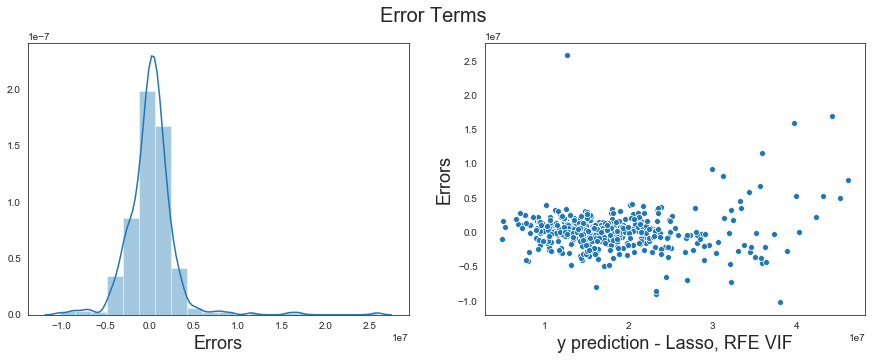

In [71]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)
#predict the price


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_lasso_vif), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_lasso_vif), x=y_test_predict_lasso_vif)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction - Lasso, RFE VIF", fontsize = 18)

<font color=red size=4> Ridge Regression</font>

In [72]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

#neg_mean_absolute_error

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010373,0.004828,0.001396,4.899057e-04,0.0001,{'alpha': 0.0001},-1.968121e+06,-1.807392e+06,-1.636164e+06,-2.216515e+06,...,-1.865658e+06,208363.672567,26,-1.052687e+06,-1.120508e+06,-1.161401e+06,-1.165110e+06,-1.144611e+06,-1.128863e+06,41214.580566
1,0.007580,0.000488,0.000997,9.608003e-07,0.001,{'alpha': 0.001},-1.968210e+06,-1.806380e+06,-1.634617e+06,-2.215435e+06,...,-1.864807e+06,208519.326383,25,-1.052649e+06,-1.120487e+06,-1.161194e+06,-1.165093e+06,-1.144397e+06,-1.128764e+06,41177.318901
2,0.008178,0.000399,0.000997,5.955694e-07,0.01,{'alpha': 0.01},-1.969053e+06,-1.797918e+06,-1.620266e+06,-2.204918e+06,...,-1.857058e+06,209769.032891,24,-1.052964e+06,-1.120606e+06,-1.159776e+06,-1.164996e+06,-1.143189e+06,-1.128306e+06,40727.667195
3,0.009375,0.001849,0.001196,3.980402e-04,0.05,{'alpha': 0.05},-1.977923e+06,-1.770574e+06,-1.586985e+06,-2.167656e+06,...,-1.836363e+06,210370.291035,23,-1.060908e+06,-1.126837e+06,-1.160813e+06,-1.165115e+06,-1.147527e+06,-1.132240e+06,38074.528714
4,0.008378,0.000799,0.001196,3.985408e-04,0.1,{'alpha': 0.1},-1.996358e+06,-1.753596e+06,-1.574300e+06,-2.133123e+06,...,-1.825672e+06,207924.209035,22,-1.078158e+06,-1.140627e+06,-1.174038e+06,-1.166955e+06,-1.159773e+06,-1.143910e+06,34711.645172


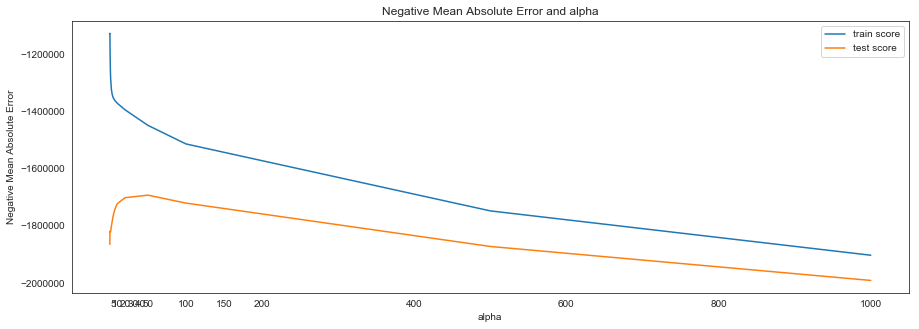

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'] #.astype('int32')

# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xticks([5,10,20,30,40,50,100,150,200,400,600,800,1000])
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
cv_results[ ['param_alpha','mean_test_score','mean_train_score'] ]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-1.865658e+06,-1.128863e+06
1,0.001,-1.864807e+06,-1.128764e+06
2,0.01,-1.857058e+06,-1.128306e+06
3,0.05,-1.836363e+06,-1.132240e+06
4,0.1,-1.825672e+06,-1.143910e+06
5,0.2,-1.819428e+06,-1.171031e+06
6,0.3,-1.819476e+06,-1.195958e+06
7,0.4,-1.821083e+06,-1.216301e+06
8,0.5,-1.822179e+06,-1.233231e+06
9,0.6,-1.822546e+06,-1.247302e+06


In [76]:
#Optimize the model
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.49874104e+04, -2.25759271e+05,  3.75239459e+05,  9.28888388e+05,
        4.03498034e+05,  1.58990881e+05,  5.27550890e+04,  2.42449909e+05,
        2.70909720e+05,  1.37282027e+04, -6.84660707e+04,  2.12534610e+05,
        6.03800079e+05,  9.05405178e+05, -9.70947439e+04,  1.18372022e+06,
        7.45200159e+05,  3.91761294e+05,  5.09608414e+05, -2.94203965e+04,
       -1.59403161e+05, -4.63353005e+05,  5.18787780e+04,  3.21890723e+05,
        2.07526230e+03,  1.18185087e+06, -4.04320413e+05,  1.13178169e+05,
       -8.58193425e+04, -1.39024636e+03,  1.10228721e+05,  1.28745818e+05,
        9.99690273e+04,  6.01273814e+03, -4.85356285e+04, -1.13846996e+05,
       -5.03697761e+05, -5.88441191e+05,  4.60769899e+05,  3.20148371e+05,
       -3.28547187e+05,  2.11613426e+04,  3.68405462e+05, -1.07143868e+06,
       -1.10875931e+06,  2.13423357e+05,  3.84532987e+05, -1.85493588e+05,
       -3.52564800e+05,  2.04097645e+05,  5.10566378e+05, -6.25560102e+03,
        4.86913230e+05, -

<font color=red size=3>__Ridge Regression R Squre Score__</font>

In [77]:
y_test_predict_ridge = round(pd.Series(ridge.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test,y_test_predict_ridge)

0.8925705243361188

Text(0.5, 0, 'y prediction- Ridge')

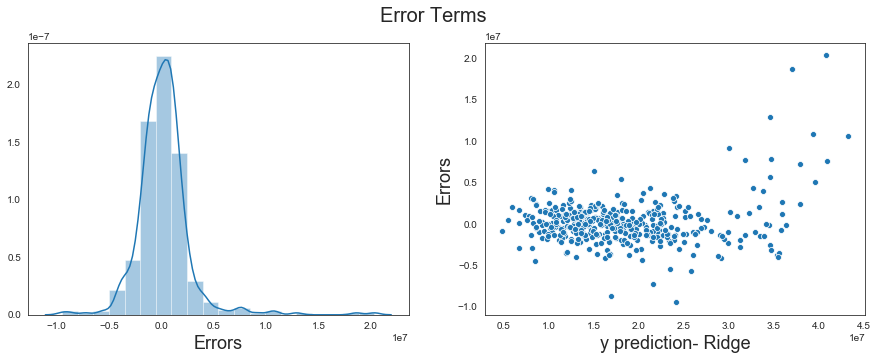

In [78]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)
#predict the price


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_ridge), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_ridge), x=y_test_predict_ridge)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction- Ridge", fontsize = 18)

<font size=3 color=red>__Elastic Regression__</font>

In [79]:
enet = ElasticNet(max_iter=50000)
#enet.fit(X_train, y_train)

In [81]:
# list of alphas to tune
alpha_val =[0.01, 0.05, 0.1, 
 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50]

params = {'alpha': alpha_val}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
enet = ElasticNet(max_iter=5000)

# cross validation
model_cv = GridSearchCV(estimator = enet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=5000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

In [84]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.205650,0.035740,0.001197,3.991127e-04,0.01,{'alpha': 0.01},-1.947080e+06,-1.725950e+06,-1.702375e+06,-1.849817e+06,...,-1.769793e+06,114871.121239,3,-1.292289e+06,-1.363083e+06,-1.397906e+06,-1.269868e+06,-1.430544e+06,-1.350738e+06,61159.577743
1,0.040890,0.003154,0.000998,5.309834e-07,0.05,{'alpha': 0.05},-1.849116e+06,-1.700149e+06,-1.639844e+06,-1.773681e+06,...,-1.702035e+06,104718.586722,2,-1.356943e+06,-1.391910e+06,-1.433620e+06,-1.333939e+06,-1.465694e+06,-1.396421e+06,48301.910154
2,0.041483,0.003826,0.001596,4.886567e-04,0.10,{'alpha': 0.1},-1.837866e+06,-1.733752e+06,-1.607164e+06,-1.746751e+06,...,-1.691855e+06,108198.020055,1,-1.405011e+06,-1.415690e+06,-1.471677e+06,-1.387774e+06,-1.493835e+06,-1.434798e+06,40765.263759
3,0.020744,0.001934,0.001397,4.894152e-04,0.50,{'alpha': 0.5},-1.933676e+06,-1.912185e+06,-1.637715e+06,-1.747285e+06,...,-1.776161e+06,126083.347954,4,-1.589666e+06,-1.560926e+06,-1.646607e+06,-1.593564e+06,-1.644039e+06,-1.606960e+06,33299.762371
4,0.020346,0.001849,0.001397,4.886361e-04,0.60,{'alpha': 0.6},-1.950254e+06,-1.939071e+06,-1.652331e+06,-1.748154e+06,...,-1.792423e+06,128574.829257,5,-1.616419e+06,-1.586496e+06,-1.673447e+06,-1.621316e+06,-1.667437e+06,-1.633023e+06,32850.954415


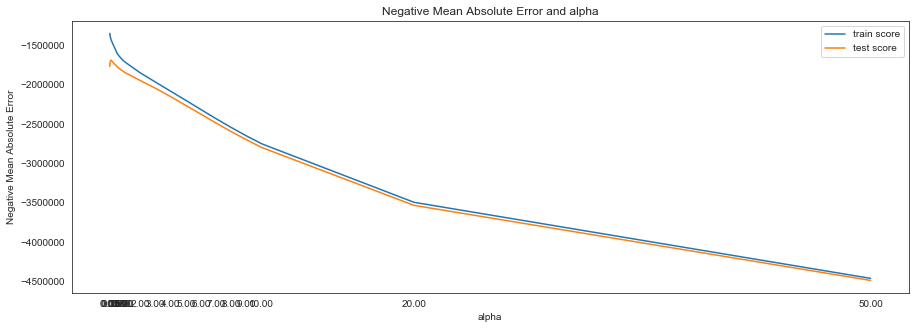

In [83]:
# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
#plt.xticks([5,20,40,50,80,100,150,200,400,600,800,1000])
plt.xticks(alpha_val)
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [85]:
alpha =.10

enet = ElasticNet(alpha=alpha)
        
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

<font color=red size=3>__ElasticNet Regression R Squre Score__</font>

In [86]:
#predict the price
y_test_predict_enet = round(pd.Series(enet.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_enet)

0.8888416005804186

Text(0.5, 0, 'y prediction')

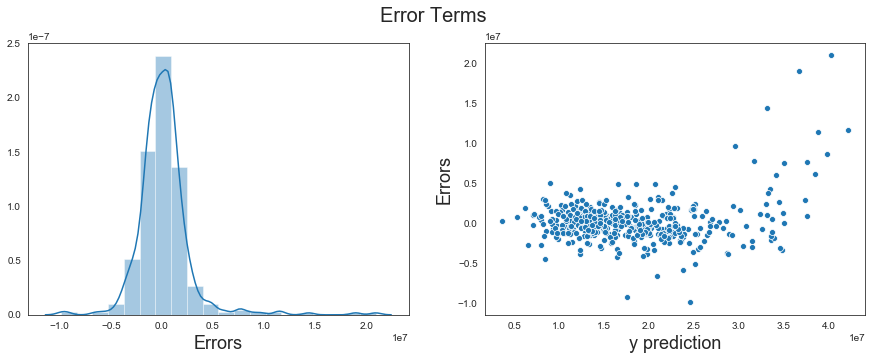

In [87]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_enet), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_enet), x=y_test_predict_enet)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction", fontsize = 18)

<font size=4 color=red>__Prepareing a Final List of Feature For Management__</font>

In [88]:
#get the coeffient and features from each model
coef_lasso = pd.Series(lasso.coef_, index = X_train.columns)
coef_lasso_vif = pd.Series(lasso_vif.coef_, index = X_train_new.columns)
coef_ridge = pd.Series(ridge.coef_, index = X_train.columns)
coef_enet = pd.Series(enet.coef_, index = X_train.columns)


In [89]:
all_fldmap['FldName']=all_fldmap.Fname+"_"+ all_fldmap.Numeric.astype("str")
all_fldmap['Feature_Name']=all_fldmap.Fname+"_"+ all_fldmap.Original

other_cols=pd.DataFrame(list(zip(cols_all_num,cols_all_num,['']*len(cols_all_num),cols_all_num, cols_all_num)))
other_cols.columns = all_fldmap.columns

all_fldmap = pd.concat( [all_fldmap, other_cols], axis=0, ignore_index=True)

df_coef_lasso_vif=pd.DataFrame(coef_lasso_vif)
df_coef_lasso_vif=df_coef_lasso_vif.reset_index()
df_coef_lasso_vif.columns = ["FldName","Coef"]

var_coef_list=df_coef_lasso_vif.merge(all_fldmap, on="FldName", how="left")
final_feature_list = var_coef_list [ var_coef_list.Coef!=0][["Feature_Name","Coef"]]

final_feature_list['Coef_abs'] = final_feature_list['Coef'].apply(lambda x : abs(x))

final_feature_list= final_feature_list.sort_values("Coef_abs",ascending=False)

<font size=5 color=red>__Final Prediction Using All Three Models__</font>

In [90]:
df_predict = pd.concat( [X_test_id,
                         y_test/100, 
                         y_test_predict_lasso_vif/100, 
                         y_test_predict_lasso/100, 
                         y_test_predict_ridge/100, 
                         y_test_predict_enet/100], axis=1)
df_predict.columns=["Id","SalesPrice","SalesPrice_Lasso+VIF","SalesPrice_Lasso","SalePrice_Ridge","SalesPrice_ElasticNet"]
df_predict.head(10)

,Id,SalesPrice,SalesPrice_Lasso+VIF,SalesPrice_Lasso,SalePrice_Ridge,SalesPrice_ElasticNet
1436,1437,120500.0,124773.25,117436.81,116497.97,114756.06
57,58,196500.0,191485.79,192972.50,198015.85,202051.56
780,781,176000.0,162676.94,169675.74,179130.57,180928.18
382,383,213500.0,206764.94,202956.74,204467.39,210732.99
1170,1171,171000.0,193892.70,196404.22,152279.06,144498.34
726,727,222000.0,243435.96,246951.49,260088.16,254574.29
258,259,231500.0,214789.60,214780.48,216124.05,219555.65
888,889,268000.0,234121.93,260195.96,251914.37,258942.64
532,533,107500.0,95034.23,108178.54,111806.21,112631.16
1055,1056,180000.0,165245.78,160902.39,168397.89,168492.27


In [91]:
print("R Square Score on Test dataset with different Models")
print("Lasso with VIF:",round(metrics.r2_score(y_test, y_test_predict_lasso_vif),2))
print("Lasso         :",round(metrics.r2_score(y_test, y_test_predict_lasso),2))
print("Ridge         :",round(metrics.r2_score(y_test, y_test_predict_ridge),2))
print("Elasticnet    :",round(metrics.r2_score(y_test, y_test_predict_enet),2))

R Square Score on Test dataset with different Models
Lasso with VIF: 0.87
Lasso         : 0.88
Ridge         : 0.89
Elasticnet    : 0.89


In [92]:
print("Mean Absolute Error on Test Dataset with different Models")
print("Lasso with VIF:", round(metrics.mean_absolute_error(y_test, y_test_predict_lasso_vif),0))
print("Lasso         :", round(metrics.mean_absolute_error(y_test, y_test_predict_lasso),0))
print("Ridge         :", round(metrics.mean_absolute_error(y_test, y_test_predict_ridge),0))
print("Elasticnet    :", round(metrics.mean_absolute_error(y_test, y_test_predict_enet),0))

Mean Absolute Error on Test Dataset with different Models
Lasso with VIF: 1755541.0
Lasso         : 1619824.0
Ridge         : 1647228.0
Elasticnet    : 1637799.0


<font size=5 color=green>Finally Visualise the Relationship between SalesPrice & Features</font>

<font size=3 color=green>Feature Given by Lasso but Dropped using RFE, VIF</font>

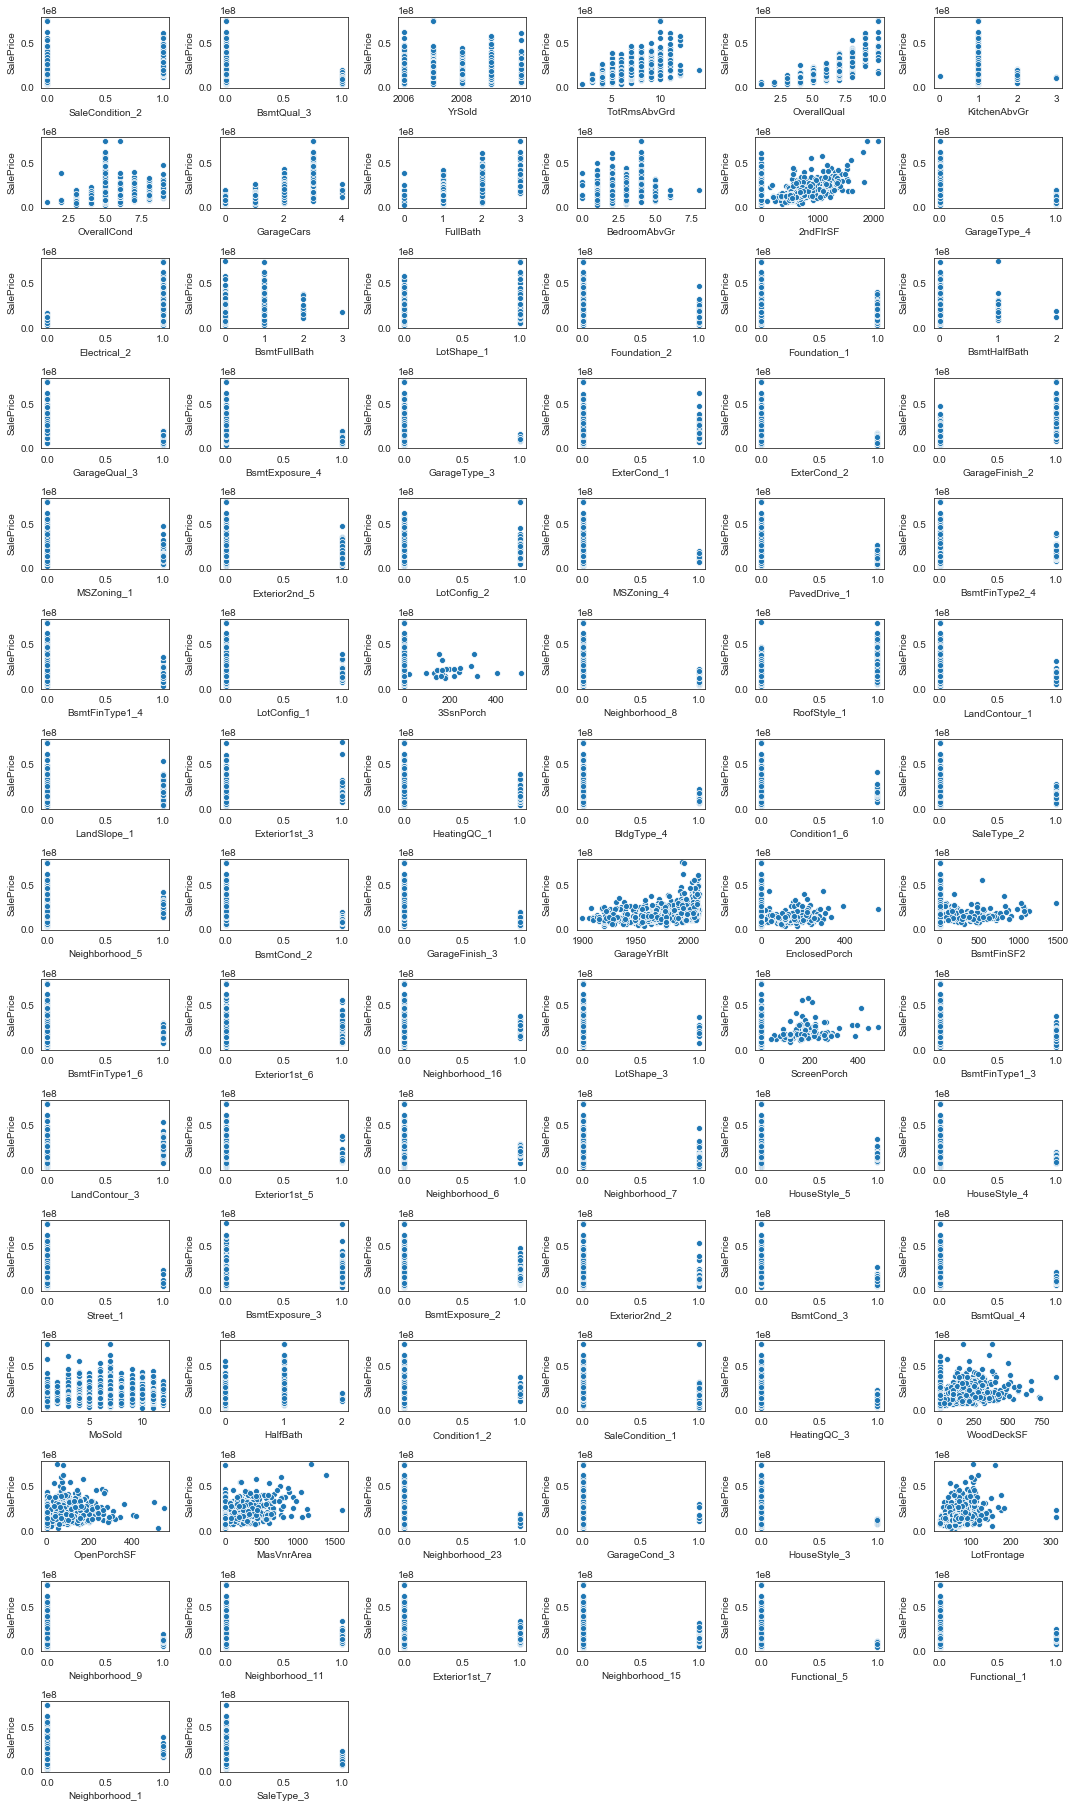

In [93]:
plt.figure(figsize=(15,100))
i=1
for dropped_f  in dropped_Feature_list:
    plt.subplot(60, 6,i)
    sns.scatterplot(x=df_house[dropped_f], y=df_house.SalePrice)
    i+=1
    
plt.tight_layout()

<font size=3 color=green>Features, which are Part of the Final Model</font>

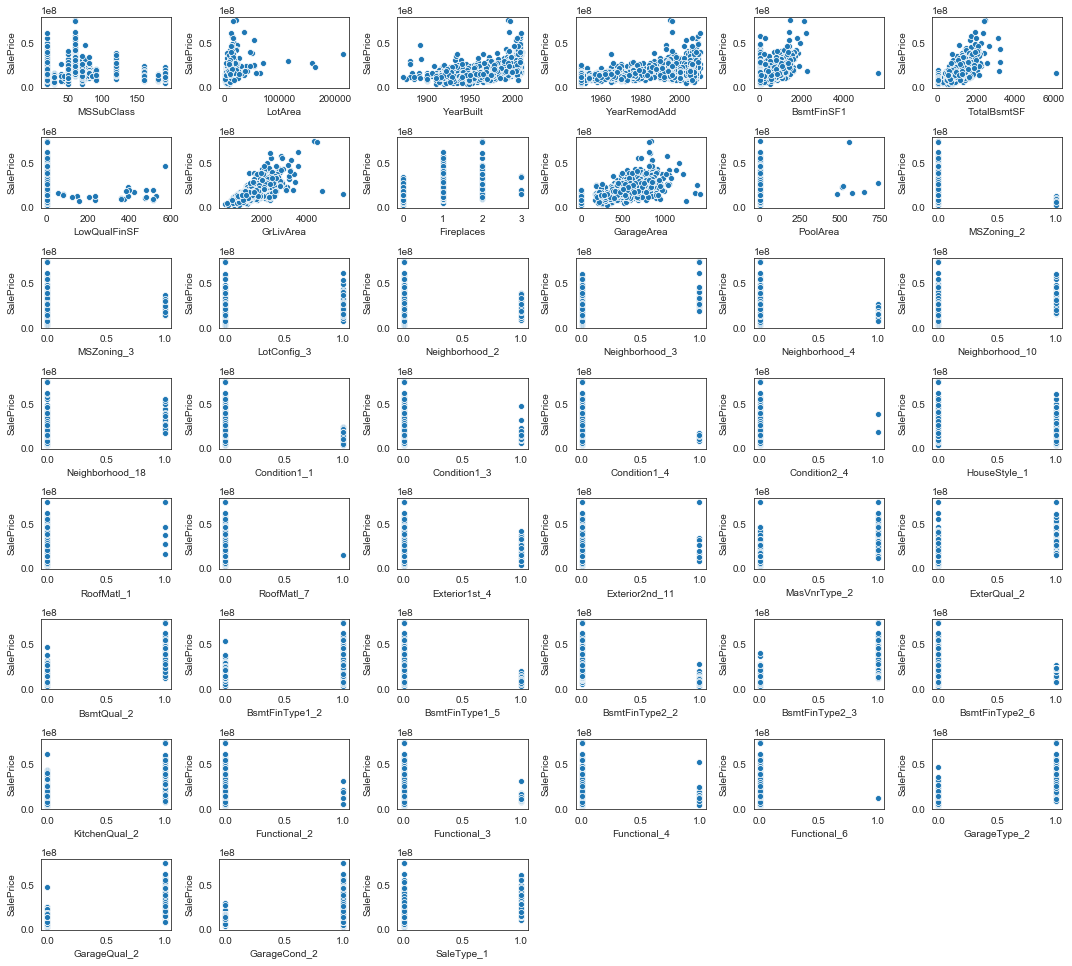

In [94]:
plt.figure(figsize=(15,100))
i=1
for kept_f  in X_train_new.columns:
    plt.subplot(60, 6,i)
    sns.scatterplot(x=df_house[kept_f], y=df_house.SalePrice)
    i+=1
    
plt.tight_layout()

<font size=4 color=red>__Final List of Feature For Management__</font>

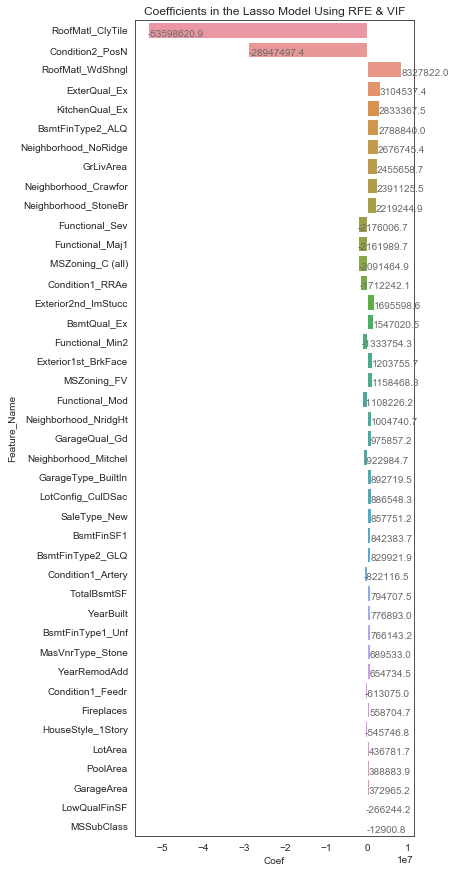

In [95]:
plt.figure(figsize=(5,15))
ax=sns.barplot( x=final_feature_list.Coef, y= final_feature_list.Feature_Name, )

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.7, \
            round(i.get_width(),1), fontsize=10,color='dimgrey')

    
plt.title("Coefficients in the Lasso Model Using RFE & VIF")
plt.show()

In [ ]:
lasso_vif.intercept_